CÂU 2: Việt Nam nằm trong top bao nhiêu, với mật độ ô nhiễm là bao nhiêu qua từng năm (2017 - 2021).

In [2]:
# Gọi các thư viện cần thiết.  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Đầu tiên ta đọc file ./airdata6years.csv thành một dataframe và lưu vào df.

In [4]:
df = pd.read_csv('./airdata6years.csv', index_col = 'Unnamed: 0')
df.head() 

,Rank,City,Country,Year_2021,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Year_2020,Year_2019,Year_2018,Year_2017
0,1,Bhiwadi,India,106.2,145.8,129.8,120.2,125.7,86.5,95.9,55.6,55.4,37.1,91.1,188.6,136.6,95.5,83.4,125.4,NaN
1,2,Ghaziabad,India,102.0,199.9,172.2,97.8,86.3,52.9,47.2,35.3,37.6,30.8,89.7,218.3,163.0,106.6,110.2,135.2,144.6
2,3,Hotan,China,101.5,NaN,NaN,158.0,91.1,167.4,57.4,70.9,93.2,79.3,126.1,111.5,62.6,110.2,110.1,116.0,91.9
3,4,Delhi,India,96.4,183.7,142.2,80.5,72.9,47.4,47.1,35.6,36.9,30.2,73.7,224.1,186.4,84.1,98.6,113.5,108.2
4,5,Jaunpur,India,95.3,182.2,143.5,91.0,70.0,51.1,40.7,33.5,34.2,36.8,75.7,196.0,195.7,NaN,NaN,NaN,NaN


Lấy dữ liệu mật độ ô nhiễm các quốc gia từ năm 2017 - 2021

In [60]:
df_Country = df.drop(['Rank', 'City','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], axis = 1)
df_Country = df_Country.groupby('Country').mean()
df_Country

,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
Country,,,,,
Afghanistan,37.500000,46.500000,58.800000,61.800000,NaN
Albania,12.500000,16.000000,NaN,NaN,NaN
Algeria,20.000000,20.200000,21.200000,NaN,NaN
Andorra,7.300000,7.400000,NaN,NaN,NaN
Angola,11.000000,13.000000,15.900000,NaN,NaN
...,...,...,...,...,...
United Arab Emirates,35.350000,28.250000,39.650000,52.050000,NaN
United Kingdom,8.294194,7.820175,9.264602,10.305085,9.955556
Uruguay,14.200000,NaN,NaN,NaN,NaN


Tính mật độ ô nhiễm trung bình của thế giới qua các năm.

In [96]:
def get(col):
    NaNValue = col.isna().sum()
    valu1 = col.dropna()
    x = np.mean(valu1)
    return x.round(1)
index_info=["mean"]
dict_info = {}
for i in df_Country.columns:
    if df_Country[i].dtype in [np.float32, np.float64]:
        dict_info[i] = get(df_Country[i])   
mean_Country_df = pd.DataFrame(dict_info, index_info)
mean_Country_df = mean_Country_df[['Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021']]
mean_Country_df

,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
mean,23.1,24.2,20.7,18.8,19.6


Lấy những địa điểm thuộc quốc gia Việt Nam từ năm 2017 -> 2021.

In [38]:
df_17_21_Vietnam = df[df['Country'] == 'Vietnam']
df_17_21_Vietnam = df_17_21_Vietnam.drop(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], axis = 1)
df_17_21_Vietnam


,Rank,City,Country,Year_2021,Year_2020,Year_2019,Year_2018,Year_2017
184,285,Pho Moi,Vietnam,36.9,NaN,NaN,NaN,NaN
200,300,Hanoi,Vietnam,36.2,37.9,46.9,40.8,45.8
339,214,Thanh Pho Thai Nguyen,Vietnam,40.8,NaN,NaN,NaN,NaN
384,235,Cho,Vietnam,39.3,NaN,NaN,NaN,NaN
422,473,Ha Tinh,Vietnam,30.0,33.4,NaN,NaN,NaN
708,809,Nhu Quynh,Vietnam,23.0,NaN,NaN,NaN,NaN
830,754,Hue,Vietnam,23.8,24.2,28.6,NaN,NaN
896,639,Long Xuyen,Vietnam,26.0,NaN,NaN,NaN,NaN
1053,1090,Thu Duc,Vietnam,20.1,NaN,NaN,NaN,NaN
1282,1317,Quan Bay,Vietnam,18.1,NaN,NaN,NaN,NaN


Tính mật độ ô nhiễm ở Việt Nam qua từng năm.

In [97]:
def get(col):
    NaNValue = col.isna().sum()
    valu1 = col.dropna()
    x = np.mean(valu1)
    return x.round(1)
index_info=["mean"]
dict_info = {}
for i in df_17_21_Vietnam.columns:
    if df_17_21_Vietnam[i].dtype in [np.float32, np.float64]:
        dict_info[i] = get(df_17_21_Vietnam[i])   
mean_VietNam_df = pd.DataFrame(dict_info, index_info)
mean_VietNam_df  = mean_VietNam_df [['Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021']]
mean_VietNam_df 

,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
mean,34.7,33.8,31.7,25.8,24.5


NHẬN XÉT:
_Dữ liệu từ năm 2017 - 2021 có nhiều thiếu xót.
_Ta thấy rằng mật độ ô nhiễm ở Việt Nam có xu hướng giảm.
GIẢI THÍCH:
_Dữ liệu thiếu xót có thể do quá trình thu thập dữ liệu ở Việt Nam còn chưa phổ biến nên dẫn đến thiếu xót.
_Mật độ ô nhiễm có xu hướng giảm do ý thức của người dân và công tác tuyên truyền bảo vệ môi trường hiệu quả.

Mật độ ô nhiễm ở Việt Nam và trên thế giới qua từng năm (2017 - 2021).

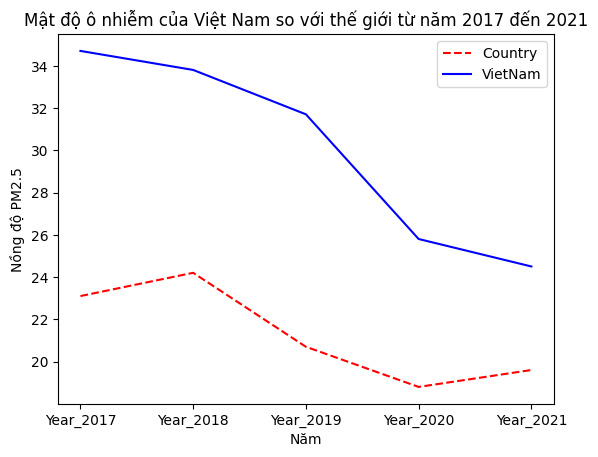

In [108]:
mean_Country = mean_Country_df.T.iloc[:, :5]
mean_VietNam = mean_VietNam_df.T.iloc[:, :5]
plt.plot(mean_Country, color = 'red', linestyle = '--')
plt.plot(mean_VietNam, color = 'blue', linestyle = '-')
plt.title('Mật độ ô nhiễm của Việt Nam so với thế giới từ năm 2017 đến 2021')
plt.xlabel('Năm')
plt.ylabel('Nồng độ PM2.5')
plt.legend(['Country', 'VietNam'])

NHẬN XÉT:
_Ta thấy rằng mật độ ô nhiễm ở Việt Nam có xu hướng giảm (Giảm mạnh trong giai đoạn từ 2019 - 2020)
_Mật độ ô nhiễm trung bình thế giới có thể chia làm 3 giai đoạn: 
    +Giai đoạn 2017 - 2018 có xu hướng tăng.
    +Giai đoạn từ 2018 - 2020 thì xu hướng giảm.
    +Giai đoạn từ 2020 - 2021 thì lại tăng trở lại.
GIẢI THÍCH:
_Giai đoạn từ 2017 - 2018, mật độ ô nhiễm trên thế giới tăng mạnh do thế giới ngày càng phát triển thì các hoạt động sinh hoạt và làm việc của con người càng làm môi trường thêm ô nhiễm.
_Giai đoạn 2018 - 2020, Mật độ ô nhiễm có xu hướng giảm ở cả Việt Nam lẫn trên thế giới:
    +Khách quan: Mật độ ô nhiễm có xu hướng giảm do ý thức của người dân và công tác tuyên truyền bảo vệ môi trường hiệu quả.
    +Chủ quan: Năm 2019, 2020 là giai đoạn xuất hiện Covid-19 ảnh hưởng rất lớn đến hoạt động sinh hoạt và làm việc của con người từ đó dẫn đến mật độ ô nhiễm giảm đi rõ rệt.
_Giai đoạn 2020 - 2021: Mật độ ô nhiễm thế giới có xu hướng tăng nhẹ do con người bắt đầu hoạt động bình thường trở lại. 